In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("segmentation.csv", sep="\t")

In [3]:
data_1 =  data.copy()

In [4]:
#Pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)
#Affichage des 5 premières lignes du dataframe
data_1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
#Taille du dataset
data_1.shape

(2240, 29)

In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data_1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Il y a 24 valeurs manquantes. Ces valeurs manquantes sont dans la colonne de la variable "Income".

In [8]:
for col in data_1:
    print((data_1[col].value_counts()))
    print('-'*50)

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64
--------------------------------------------------
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64
--------------------------------------------------
Graduation    1127
PhD            486
Master         370
2n Cycle      

Les variables **Dt_Customer** et **ID** ne nous serviront pas dans la suite de notre analyse. Il conviendra donc de les retirer de notre jeu de données

In [9]:
df = data_1.drop(['ID','Dt_Customer'], axis=1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [10]:
var_quanti = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
len(var_quanti)

13

In [11]:
var_quali = ['Kidhome','Teenhome','Education','Marital_Status','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']
len(var_quali)

11

## I) ANALYSE EXPLORATOIRE

### I.1) Différentes réprésentations(graphiques) d'une variable

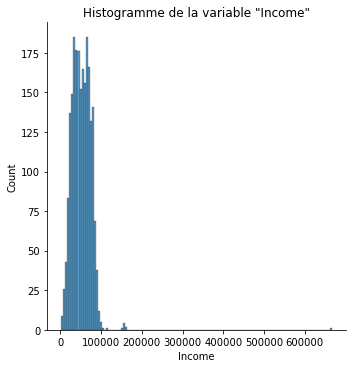

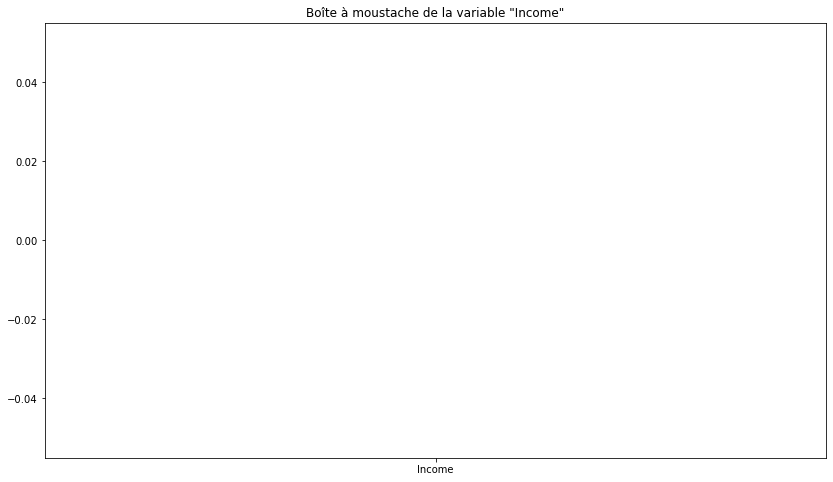

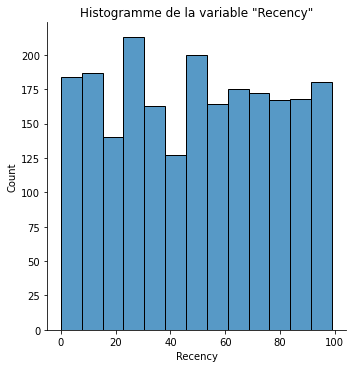

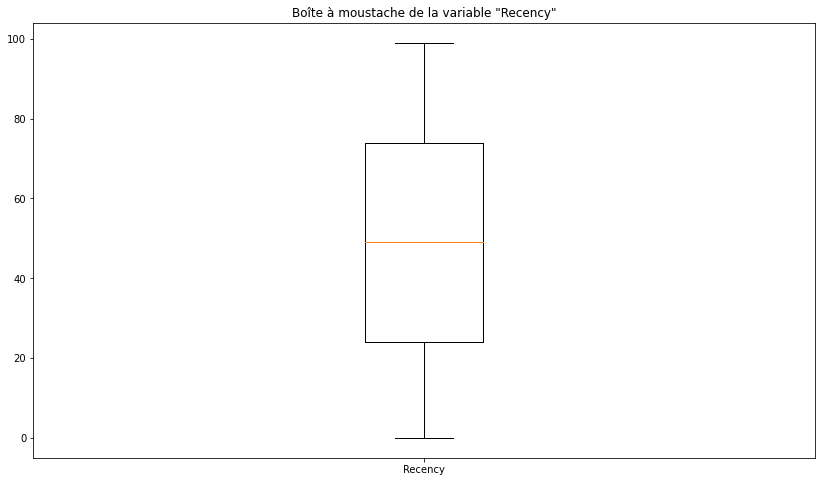

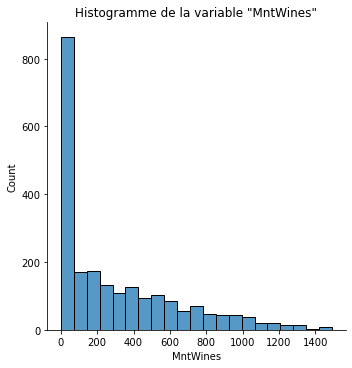

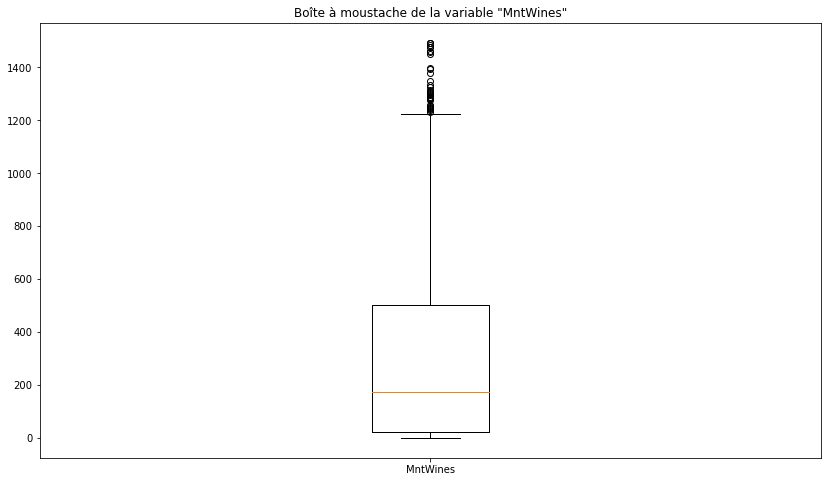

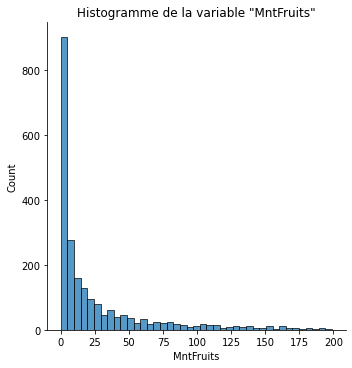

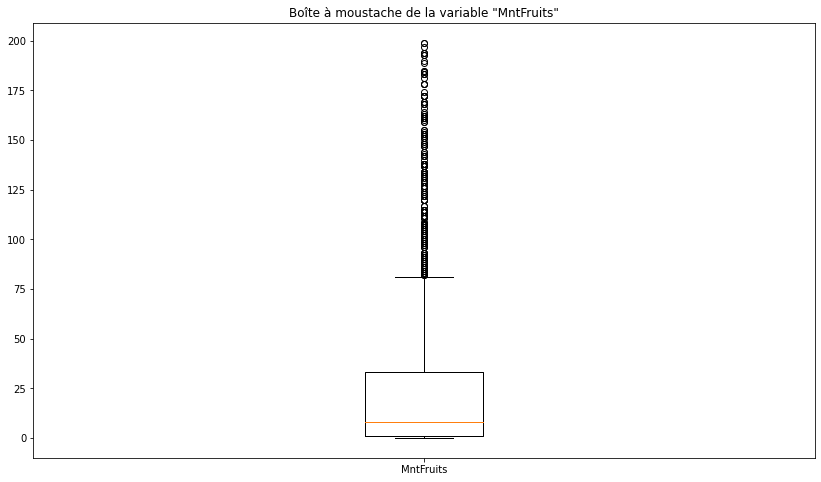

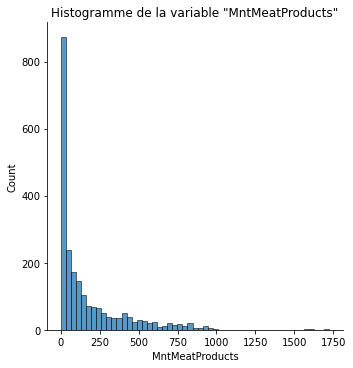

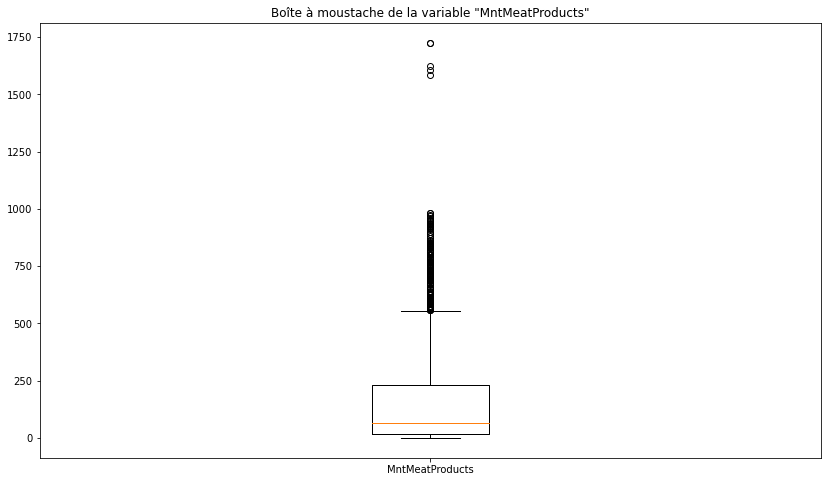

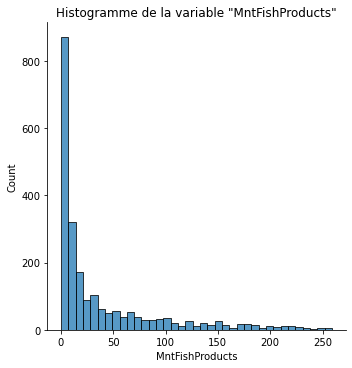

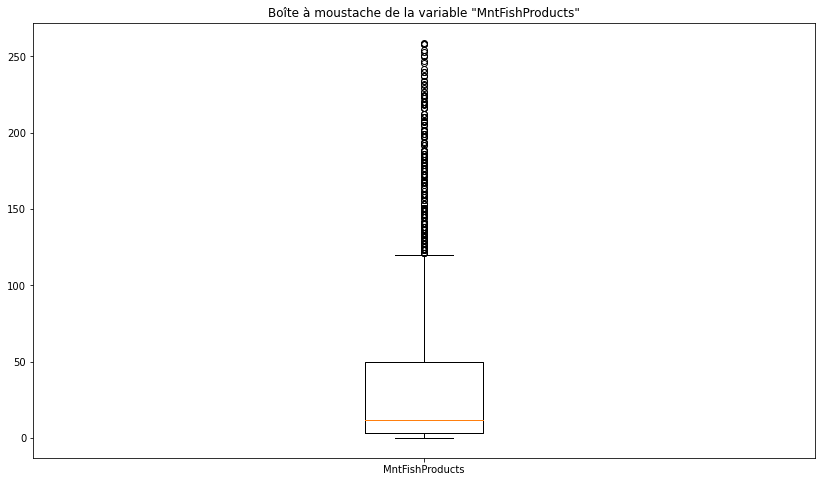

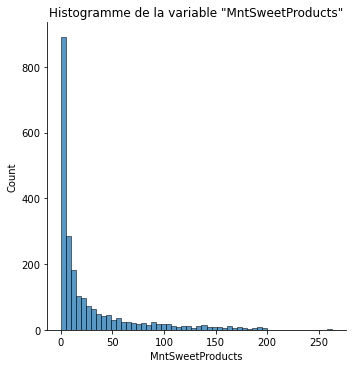

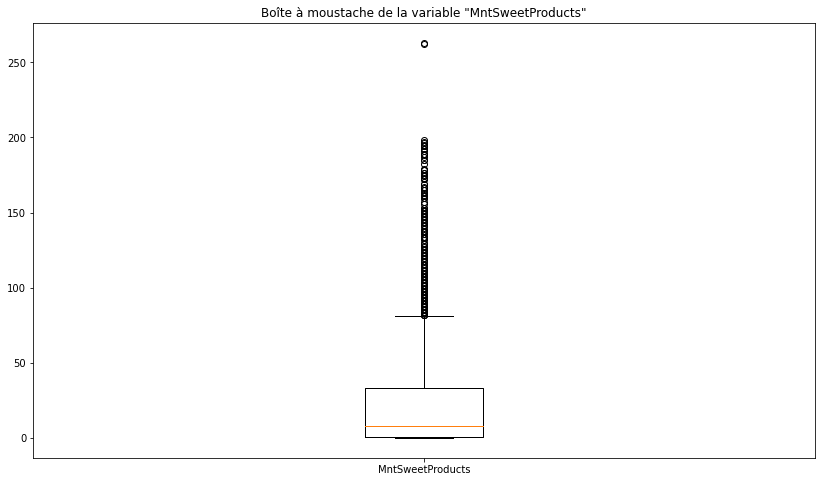

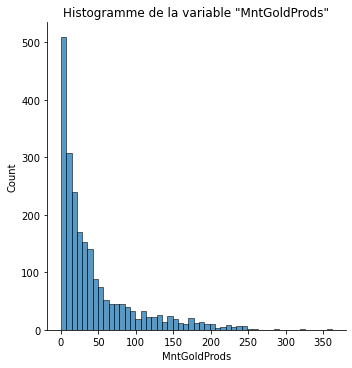

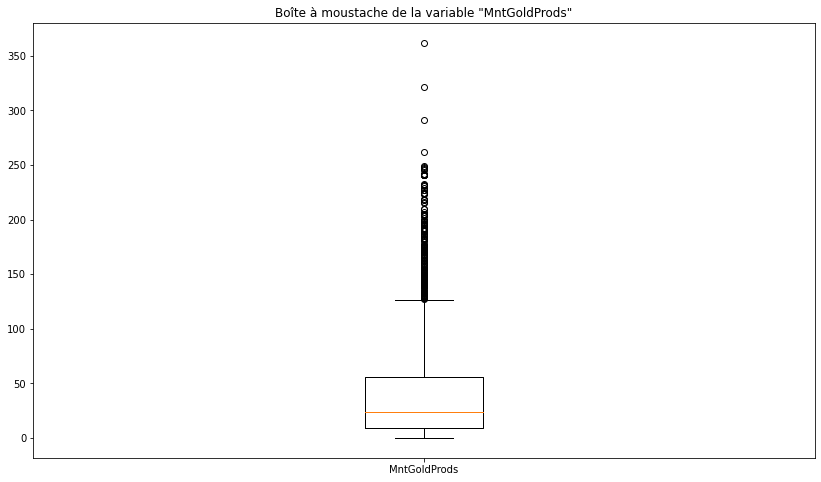

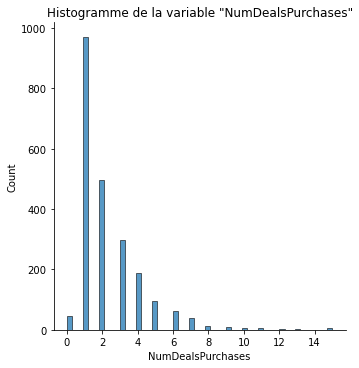

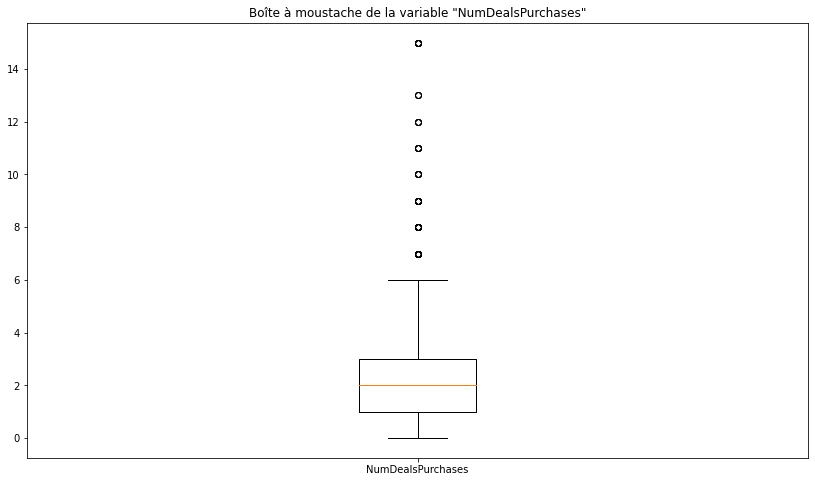

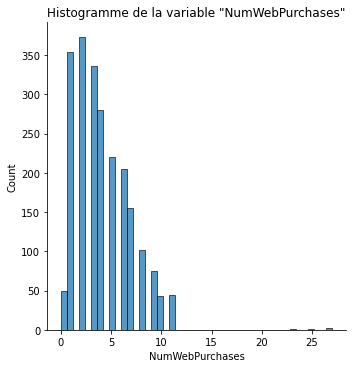

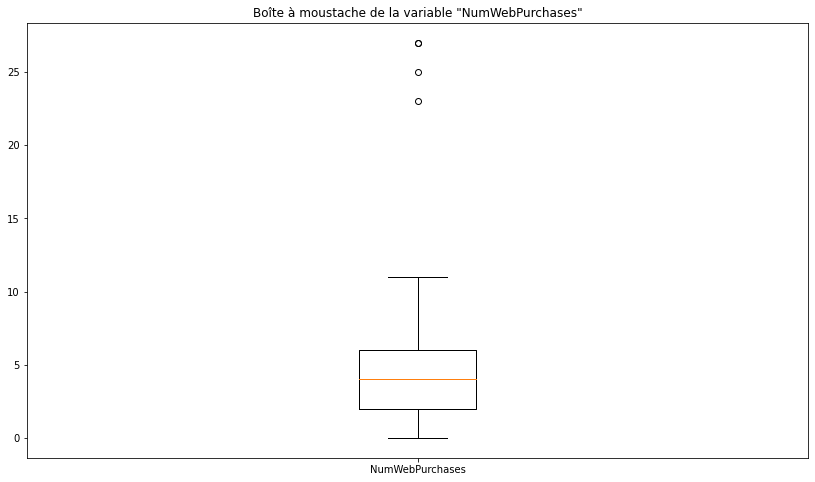

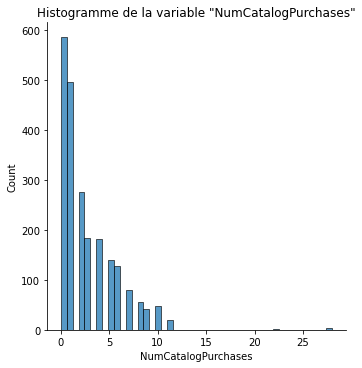

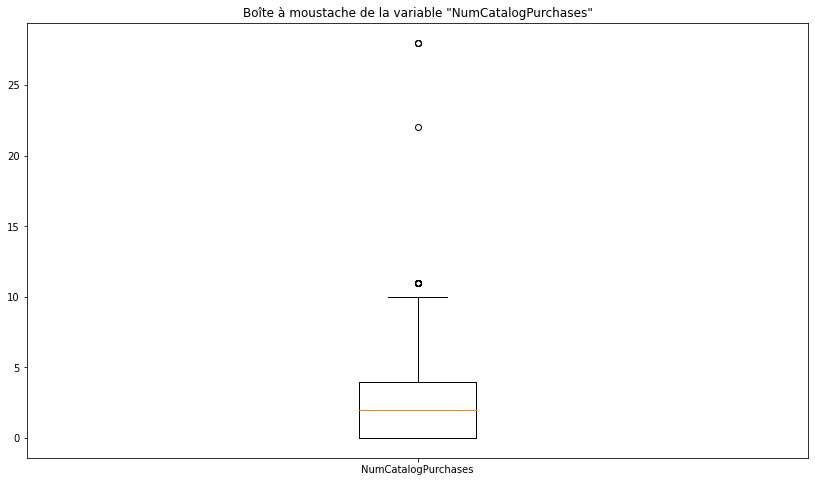

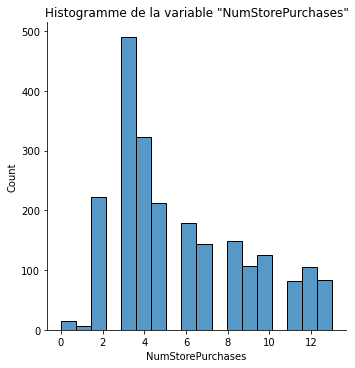

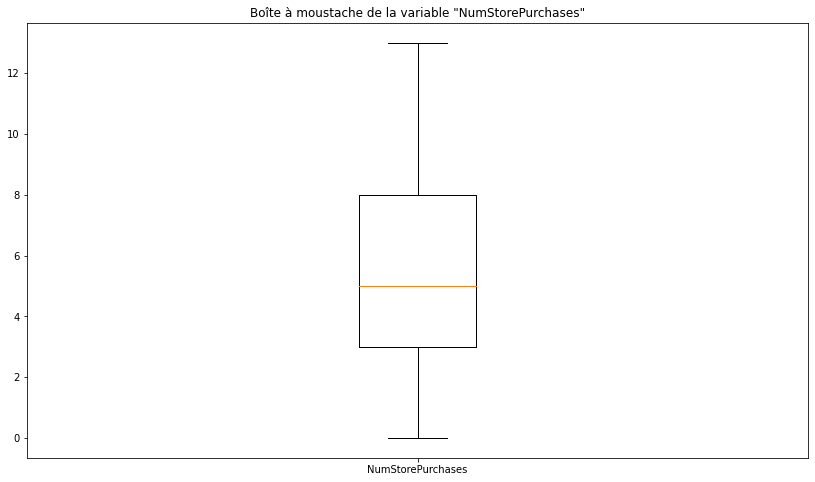

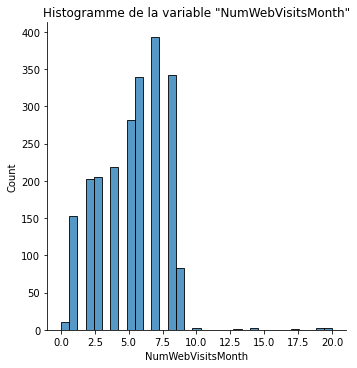

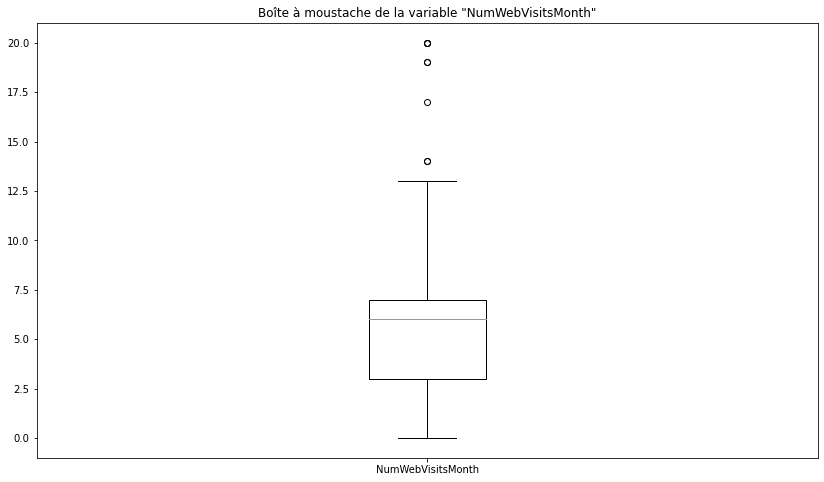

In [12]:
for col in var_quanti:
    print("=="*50)
    sns.displot(df[col])
    plt.title(f'Histogramme de la variable "{col}"')
    plt.show()
    
    plt.figure(figsize=(14,8))
    plt.boxplot(df[col])
    plt.title(f'Boîte à moustache de la variable "{col}"')
    plt.gca().xaxis.set_ticklabels([f'{col}'])
    plt.show()

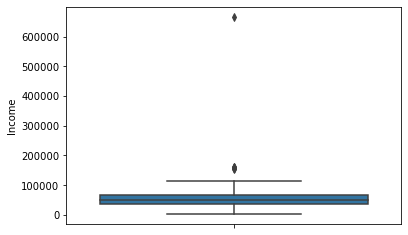

In [13]:
sns.boxplot(y="Income",data=df)
plt.show()

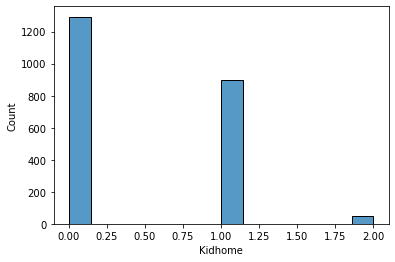

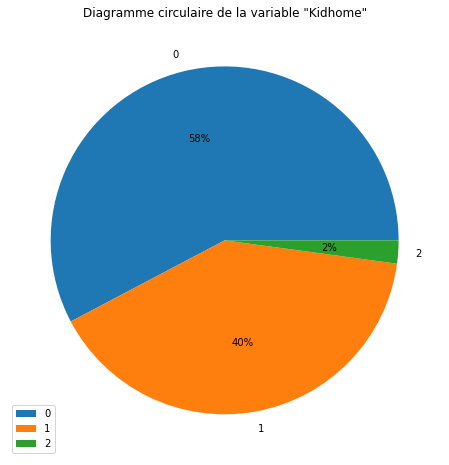

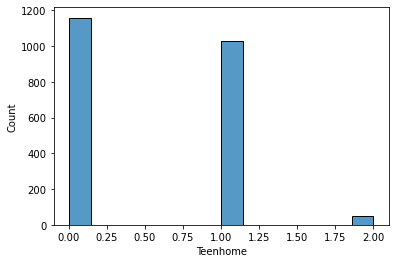

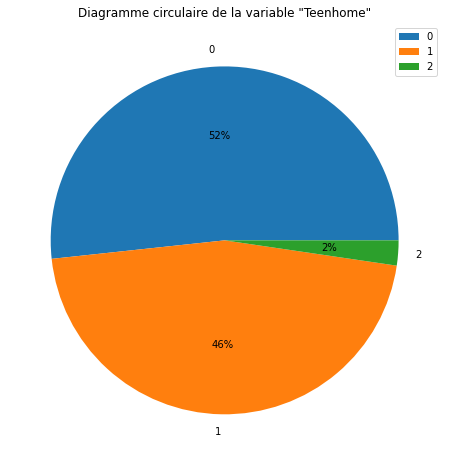

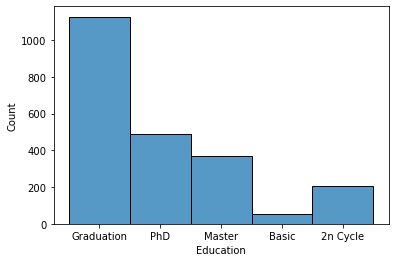

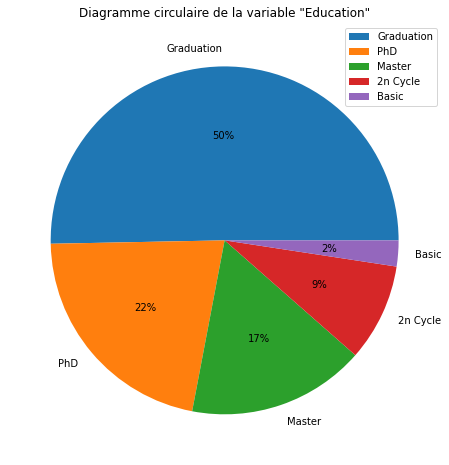

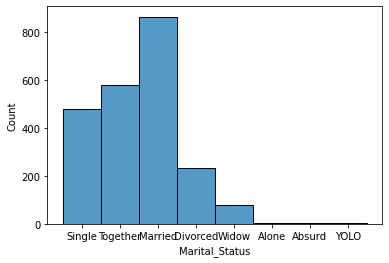

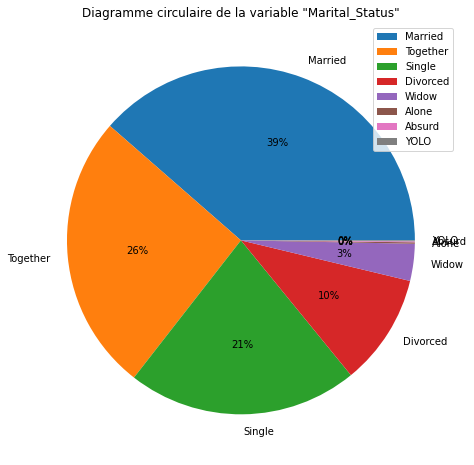

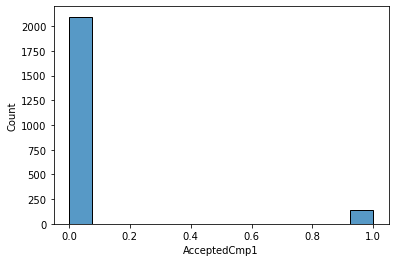

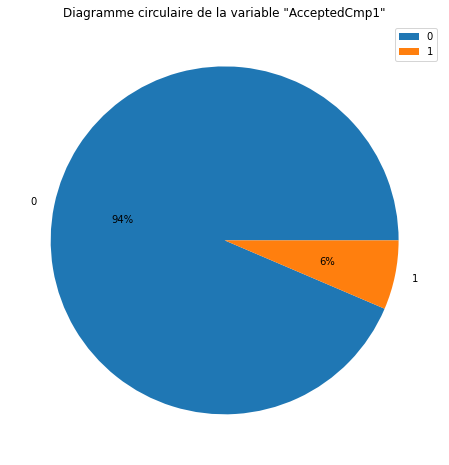

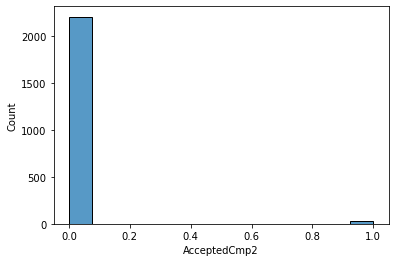

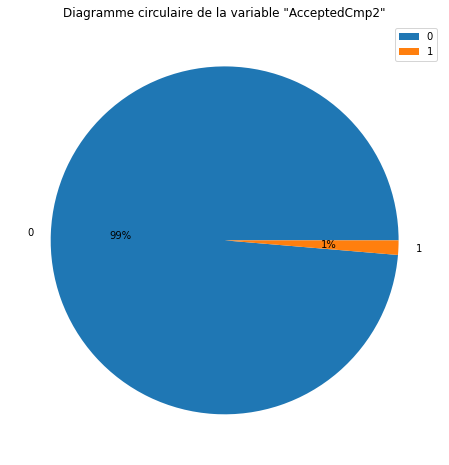

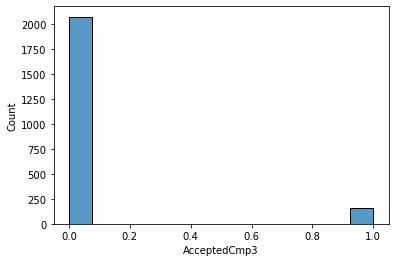

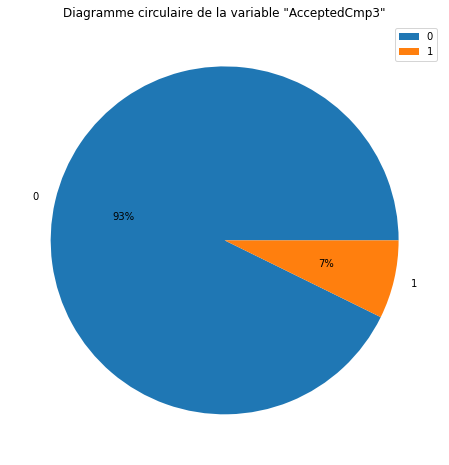

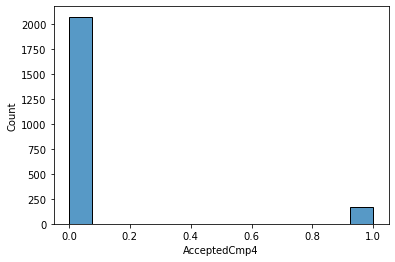

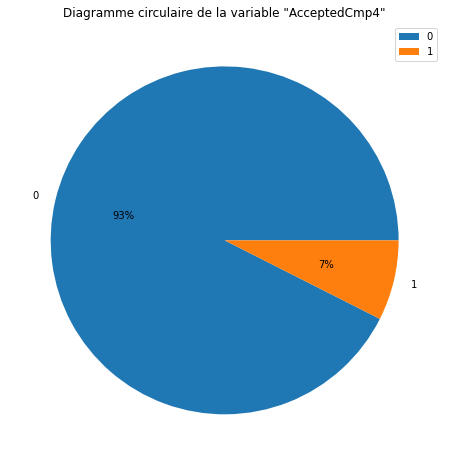

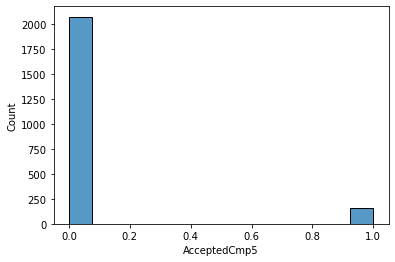

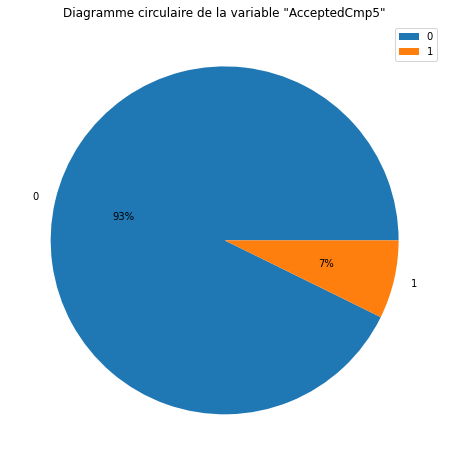

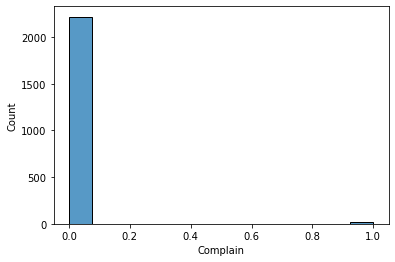

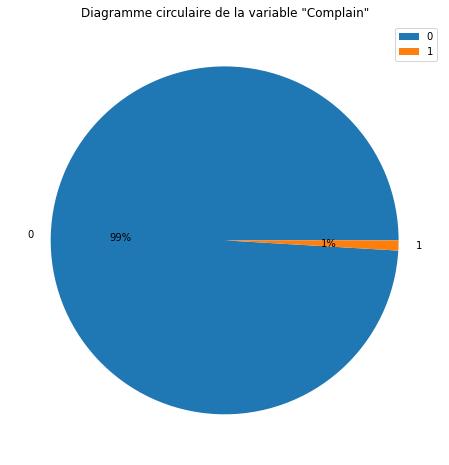

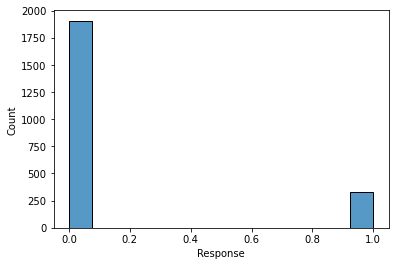

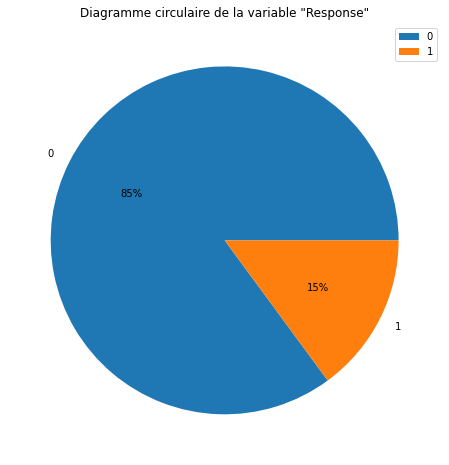

In [14]:
for col in var_quali:
    
    sns.histplot(data = df[col])
    plt.show()
    
    counts = df[col].value_counts()
    modalities = counts.index
    plt.figure(figsize = (14,8))
    plt.pie(counts, labels = modalities, autopct='%1.0f%%')
    plt.title(f'Diagramme circulaire de la variable "{col}"')
    plt.legend()
    plt.show()  

### I.2) Différentes réprésentations(graphiques) par groupe de deux(2) variables

#### I.2.1) Groupe de variables quantitative-quantitative (quanti-quanti)¶

In [15]:
df_quanti = pd.DataFrame(df, columns = var_quanti)

In [ ]:
sns.pairplot(df_quanti)

#### I.2.2) Groupe de variables quantitative-qualitative (quanti-quali)

In [ ]:
for j in var_quanti:
    for i in var_quali:
        print("=="*50)
        plt.figure(figsize=(14,8))
        sns.boxplot(y=j, x=i, data=data)
        plt.show()

#### I.2.3) Groupe de variables qualitative-qualitative (quali-quali)

## II) PREPROCESSING

#### 1) Supression des valeurs manquantes

Il s'agit ici d'une suppression des valeurs manquantes dans le dataset par les lignes

In [ ]:
df = df.dropna(axis=0)
df

Vérifions s'il n'y a plus de données manquantes

In [ ]:
df.isna().sum()

Effectivement, il n'y a plus de données manquantes

#### 2) Encodage du dataset

On remplacera les modalités des variables qualitatives du dataset par des chiffres adéquats.

In [ ]:
def encodage(dataframe):
    code = {
        'Single':0, 'Married':1, 'Divorced':2, 'Together':3, 'Widow':4, 'Alone':5, 'Absurd':6, 'YOLO':7,  
        'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4
    }
    for col in dataframe.select_dtypes('object').columns:
        dataframe.loc[:,col] = dataframe[col].map(code)
    
    return dataframe

In [ ]:
df = encodage(df)
df

Le dataset a été bien encodé.